In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('F:/Data science material/Additional - Projects/Sale prediction/Input/train.csv')
test_df = pd.read_csv('F:/Data science material/Additional - Projects/Sale prediction/Input/test.csv')

In [3]:
final_df = pd.merge(train_df,test_df,how='outer')

In [4]:
final_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
final_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [7]:
final_df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023976,0.020276,0.004568,0.002291,0.002490,0.004716
Occupation,-0.023976,1.000000,0.023563,-0.008441,-0.000773,0.010450,0.020833
Marital_Status,0.020276,0.023563,1.000000,0.019579,0.017131,0.018471,-0.000463
Product_Category_1,0.004568,-0.008441,0.019579,1.000000,0.540426,0.228299,-0.343703
Product_Category_2,0.002291,-0.000773,0.017131,0.540426,1.000000,0.543578,-0.209918
Product_Category_3,0.002490,0.010450,0.018471,0.228299,0.543578,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [8]:
#sns.pairplot(final_df)

In [9]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


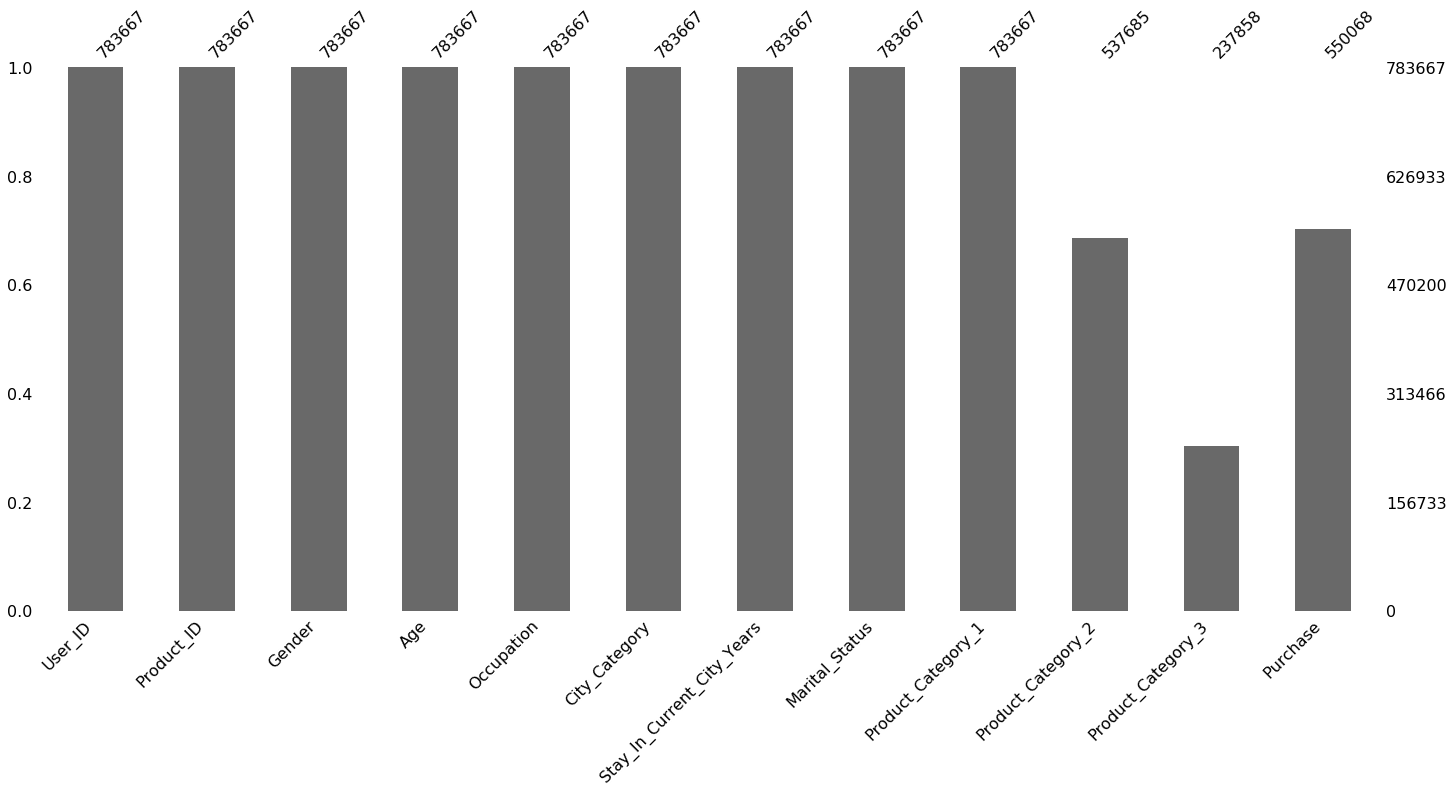

In [10]:
#Now we can see the missing value chart
import missingno as msno
msno.bar(final_df)

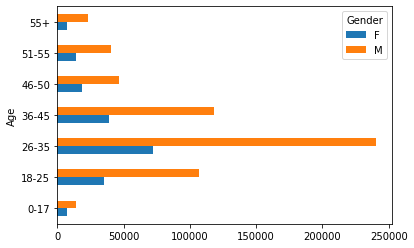

In [11]:
grpby=final_df.groupby('Age').Gender.value_counts()
grpby.unstack().plot.barh()

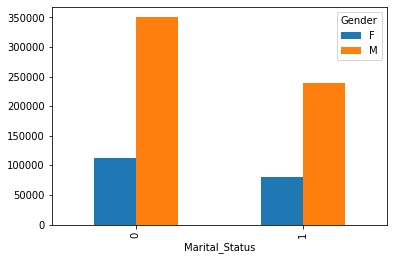

In [12]:
grpby=final_df.groupby('Marital_Status').Gender.value_counts()
grpby.unstack().plot.bar()

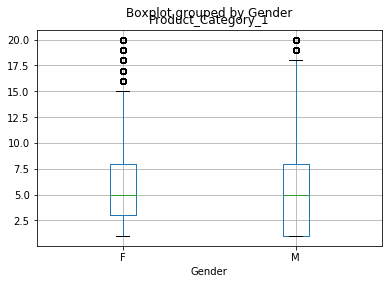

In [13]:
final_df.boxplot(by ='Gender', column =['Product_Category_1'], grid = True) 

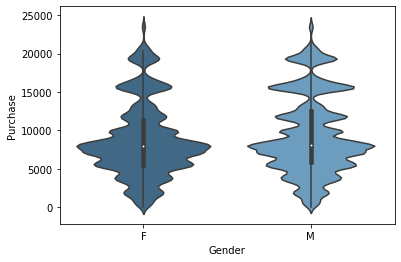

In [14]:
sns.violinplot("Gender", y="Purchase", data=train_df,
                 palette="Blues_d")

In [15]:
#Finding missing value percentage 
#Displaying total no. of null values
total1=final_df.isnull().sum()
total2=final_df.isnull().count()
Missing_value=round(((total1/total2)*100),2)
Missing_value_df=pd.concat([total1, Missing_value], axis=1, keys=['Total', '%'])
Missing_value_df

,Total,%
User_ID,0,0.00
Product_ID,0,0.00
Gender,0,0.00
Age,0,0.00
Occupation,0,0.00
City_Category,0,0.00
Stay_In_Current_City_Years,0,0.00
Marital_Status,0,0.00
Product_Category_1,0,0.00
Product_Category_2,245982,31.39


In [16]:
#Since we have more than 50% missing values in Product_Category_3, we can remove this feature
final_df = final_df.drop(['User_ID','Product_Category_3'],axis=1)

In [17]:
# replacing null values with random values between low value 2 and max value 18 for Product_Category_2
null_count = final_df['Product_Category_2'].isnull().sum()
rand_val=np.random.randint(2,18,null_count)
category = final_df['Product_Category_2'].copy()
category[np.isnan(category)] = rand_val
final_df['Product_Category_2'] = category

In [18]:
final_df['Product_ID'] = final_df['Product_ID'].str.replace('P',' ')
final_df['Product_ID'] = final_df['Product_ID'].astype(int)

In [19]:
final_df['Stay_In_Current_City_Years'] = final_df['Stay_In_Current_City_Years'].replace('4+','4').astype(int)

In [20]:
final_df=pd.get_dummies(final_df,columns=['Gender','City_Category','Age'])

In [21]:
train = final_df.iloc[:550068,:]
test = final_df.iloc[550068:,:]

In [22]:
test = test.drop(['Purchase'], axis=1)
y = train['Purchase']
x = train.drop(['Purchase'],axis=1)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=30)
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

In [25]:
RFR = RandomForestRegressor(random_state=70, bootstrap= True,
 max_depth= 80,
 min_samples_split= 50,
 n_estimators= 100)
RFR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=50, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=70, verbose=0, warm_start=False)

In [26]:
RFR_y_pred = RFR.predict(x_test)

In [27]:
coef = pd.DataFrame(LR.coef_, x_test.columns, columns=['Coefficient'])
print(coef)
print(LR.intercept_)

                            Coefficient
Product_ID                    -0.003746
Occupation                     5.951414
Stay_In_Current_City_Years     5.682788
Marital_Status               -50.464014
Product_Category_1          -410.667217
Product_Category_2           -47.298377
Gender_F                    -267.599462
Gender_M                     267.599462
City_Category_A             -302.202984
City_Category_B             -134.478898
City_Category_C              436.681883
Age_0-17                    -552.158629
Age_18-25                   -219.602781
Age_26-35                    -12.740079
Age_36-45                    109.287008
Age_46-50                     73.545455
Age_51-55                    397.851796
Age_55+                      203.817231
12419.714925170216


In [28]:
from sklearn.metrics import mean_squared_error, r2_score
import math
#Linear Regression
MSE = math.floor(mean_squared_error(y_test, y_pred))
RMSE = math.floor(np.sqrt(MSE))
rsquare = round(r2_score(y_test, y_pred)*100,0)

#Random Forest regressor
MSE1 = math.floor(mean_squared_error(y_test, RFR_y_pred))
RMSE1 = math.floor(np.sqrt(MSE1))
rsquare1 = round(r2_score(y_test, RFR_y_pred)*100,0)

In [29]:
rows =[[MSE, MSE1], [RMSE, RMSE1], [rsquare, rsquare1]]
Score = pd.DataFrame(rows,index=['MSE','RMSE','Rsquare'],columns=['Linear Regression', 'RandomForestRegressor'])
Score

,Linear Regression,RandomForestRegressor
MSE,21879678.0,7144533.0
RMSE,4677.0,2672.0
Rsquare,13.0,72.0
